# Crack Images Classification Using Keras

In [1]:
!pip install skillsnetwork

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.5 MB/s eta 0:00:00


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import skillsnetwork
from PIL import Image

import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense

from keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input

In [7]:
await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0321EN-SkillsNetwork/concrete_data_week3.zip", overwrite=True)

  0%|          | 0/30036 [00:00<?, ?it/s]

Saved to '.'


## ImageDataGenerator

In [8]:
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
train_gen = data_generator.flow_from_directory('concrete_data_week3/train', target_size=(224,224),
                                               batch_size=100, class_mode='categorical')
validation_gen = data_generator.flow_from_directory('concrete_data_week3/valid', target_size=(224,224),
                                               batch_size=100, class_mode='categorical')


Found 10001 images belonging to 2 classes.
Found 5001 images belonging to 2 classes.


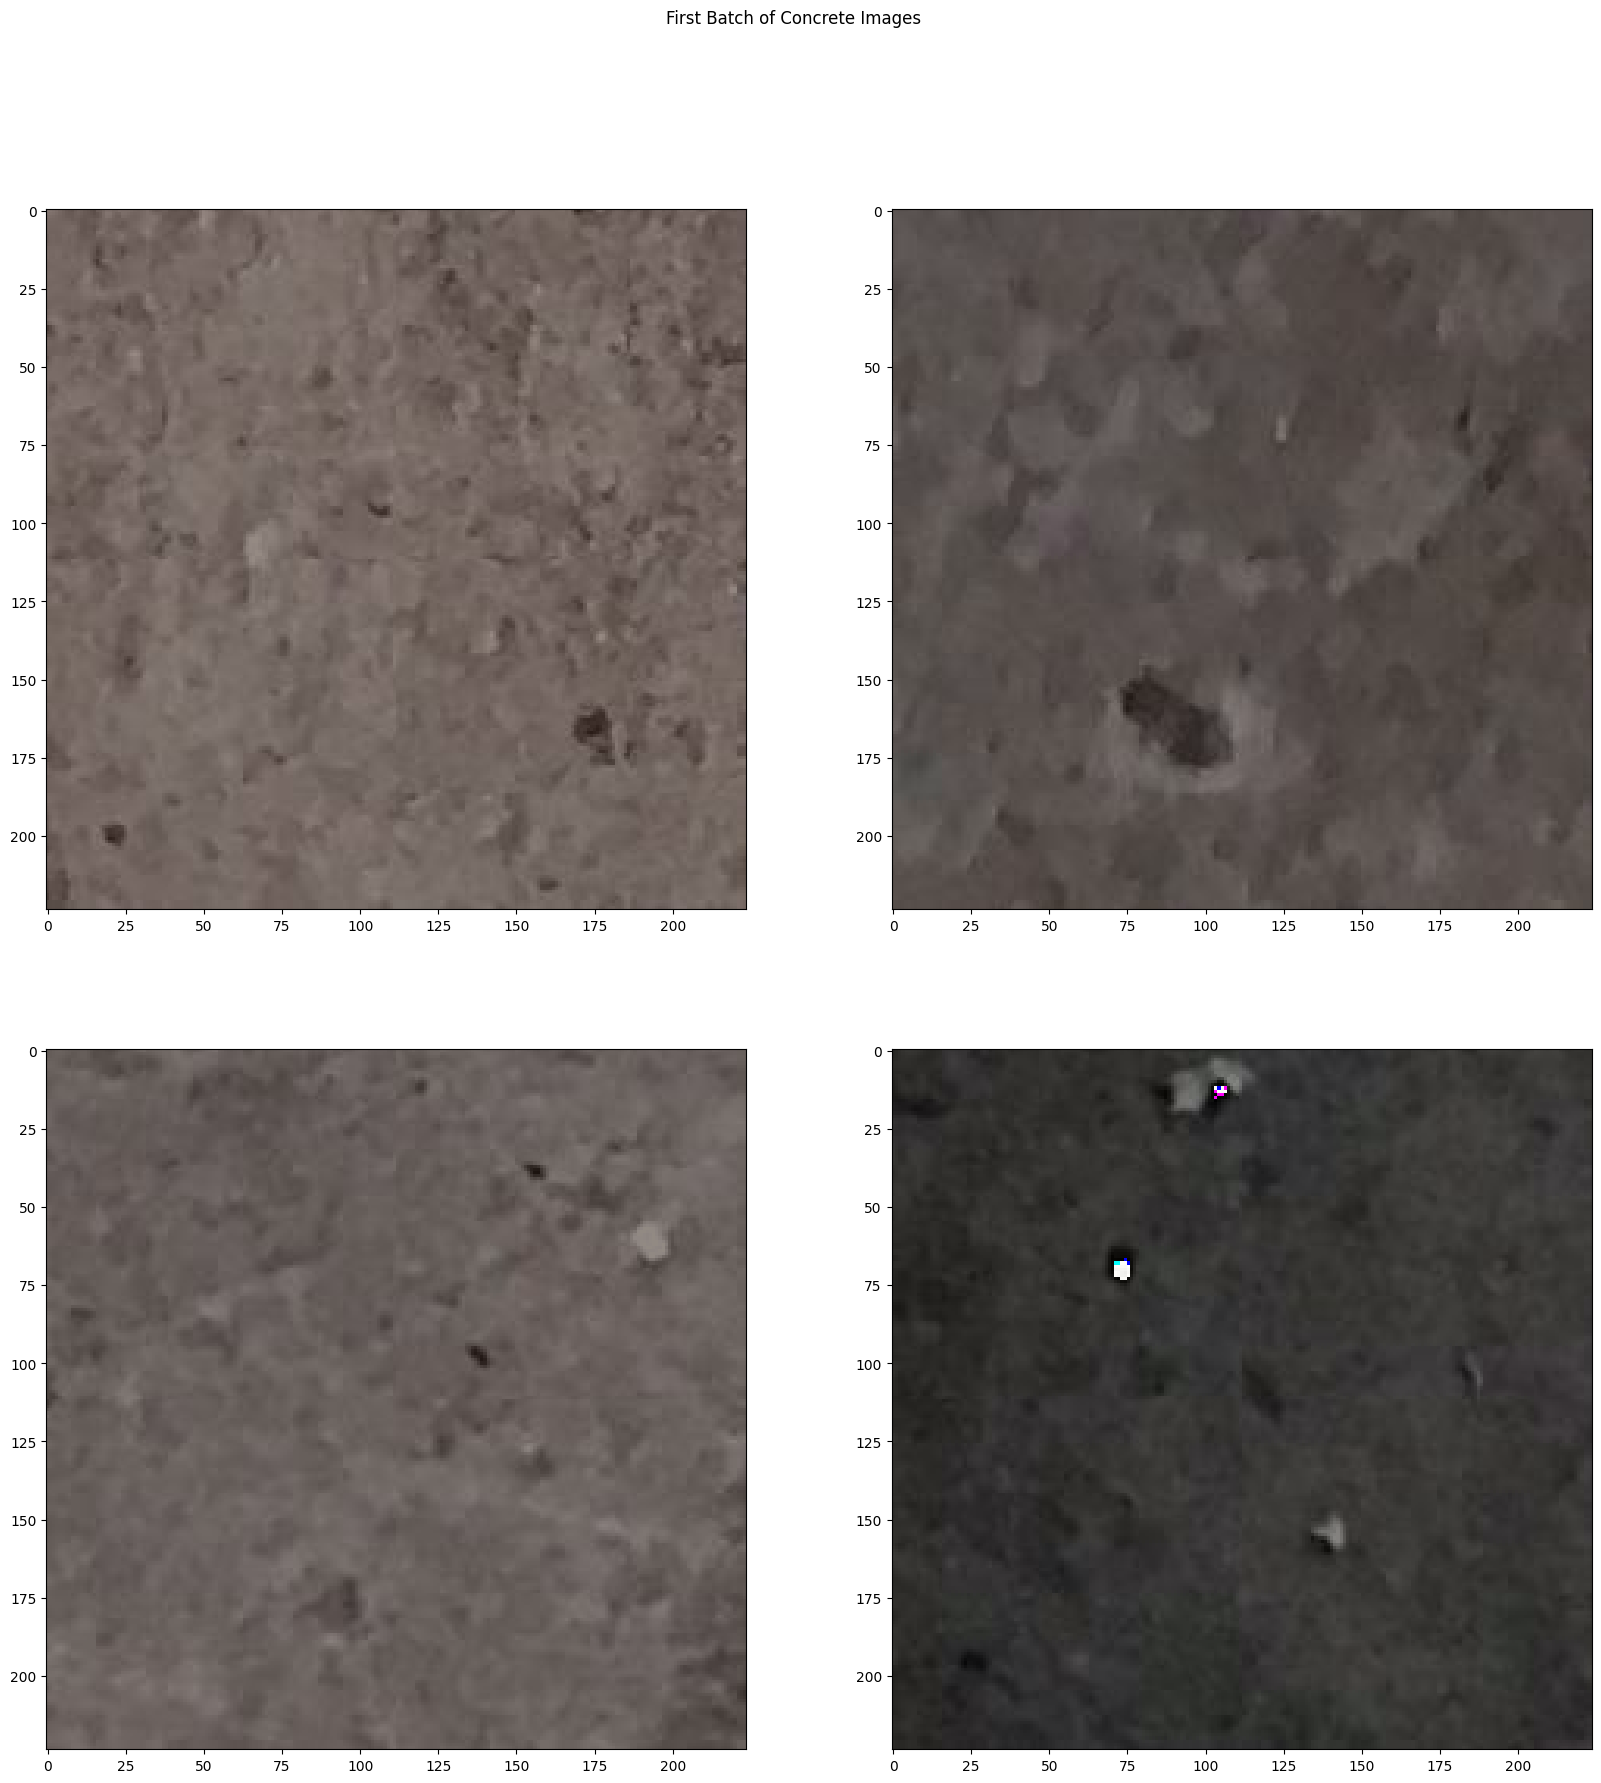

In [9]:
fig, axs= plt.subplots(nrows=2,ncols=2, figsize=(20,20))
first_batch_images = next(train_gen)[0]

ind = 0
for ax_row in axs:
  for ax_col in ax_row:
    image_data = first_batch_images[ind].astype(np.uint8)
    ax_col.imshow(image_data)
    ind += 1

fig.suptitle('First Batch of Concrete Images')
plt.show()

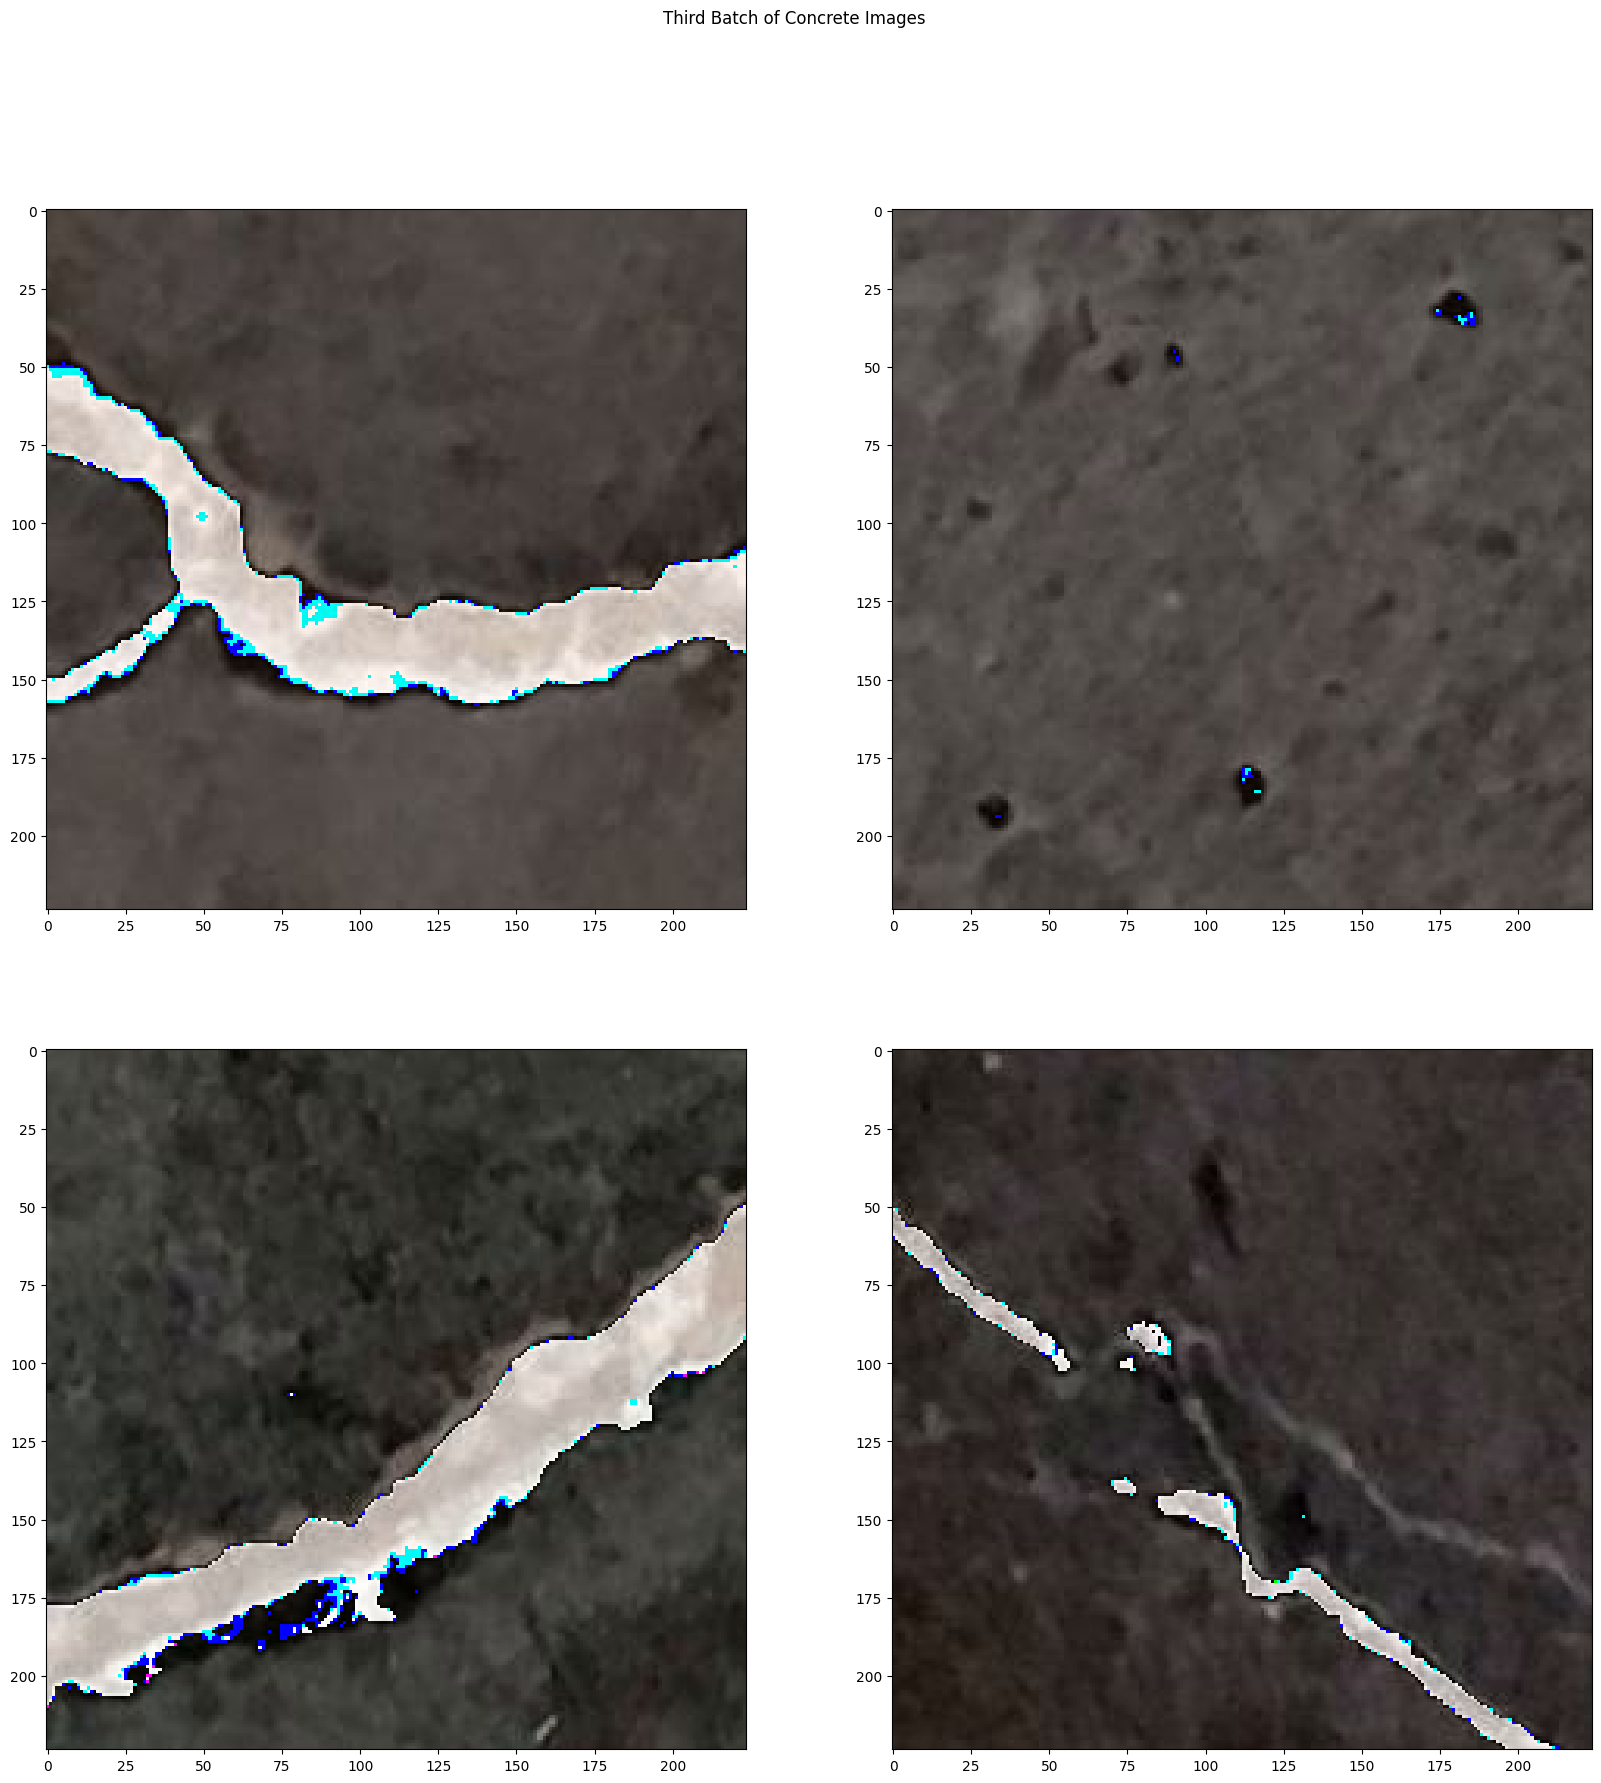

In [10]:
fig, axs= plt.subplots(nrows=2,ncols=2, figsize=(20,20))

second_batch_images = next(train_gen)[0]
third_batch_images = next(train_gen)[0]

ind = 0
for ax_row in axs:
  for ax_col in ax_row:
    image_data = third_batch_images[ind].astype(np.uint8)
    ax_col.imshow(image_data)
    ind += 1

fig.suptitle('Third Batch of Concrete Images')
plt.show()

In [11]:
fourth_batch_labels = next(train_gen)[1]
positive_count = np.sum(fourth_batch_labels[:, 1])
negative_count = np.sum(fourth_batch_labels[:, 0])

print(f"Fourth batch contains {int(positive_count)} positive images and {int(negative_count)} negative images.")

Fourth batch contains 48 positive images and 52 negative images.


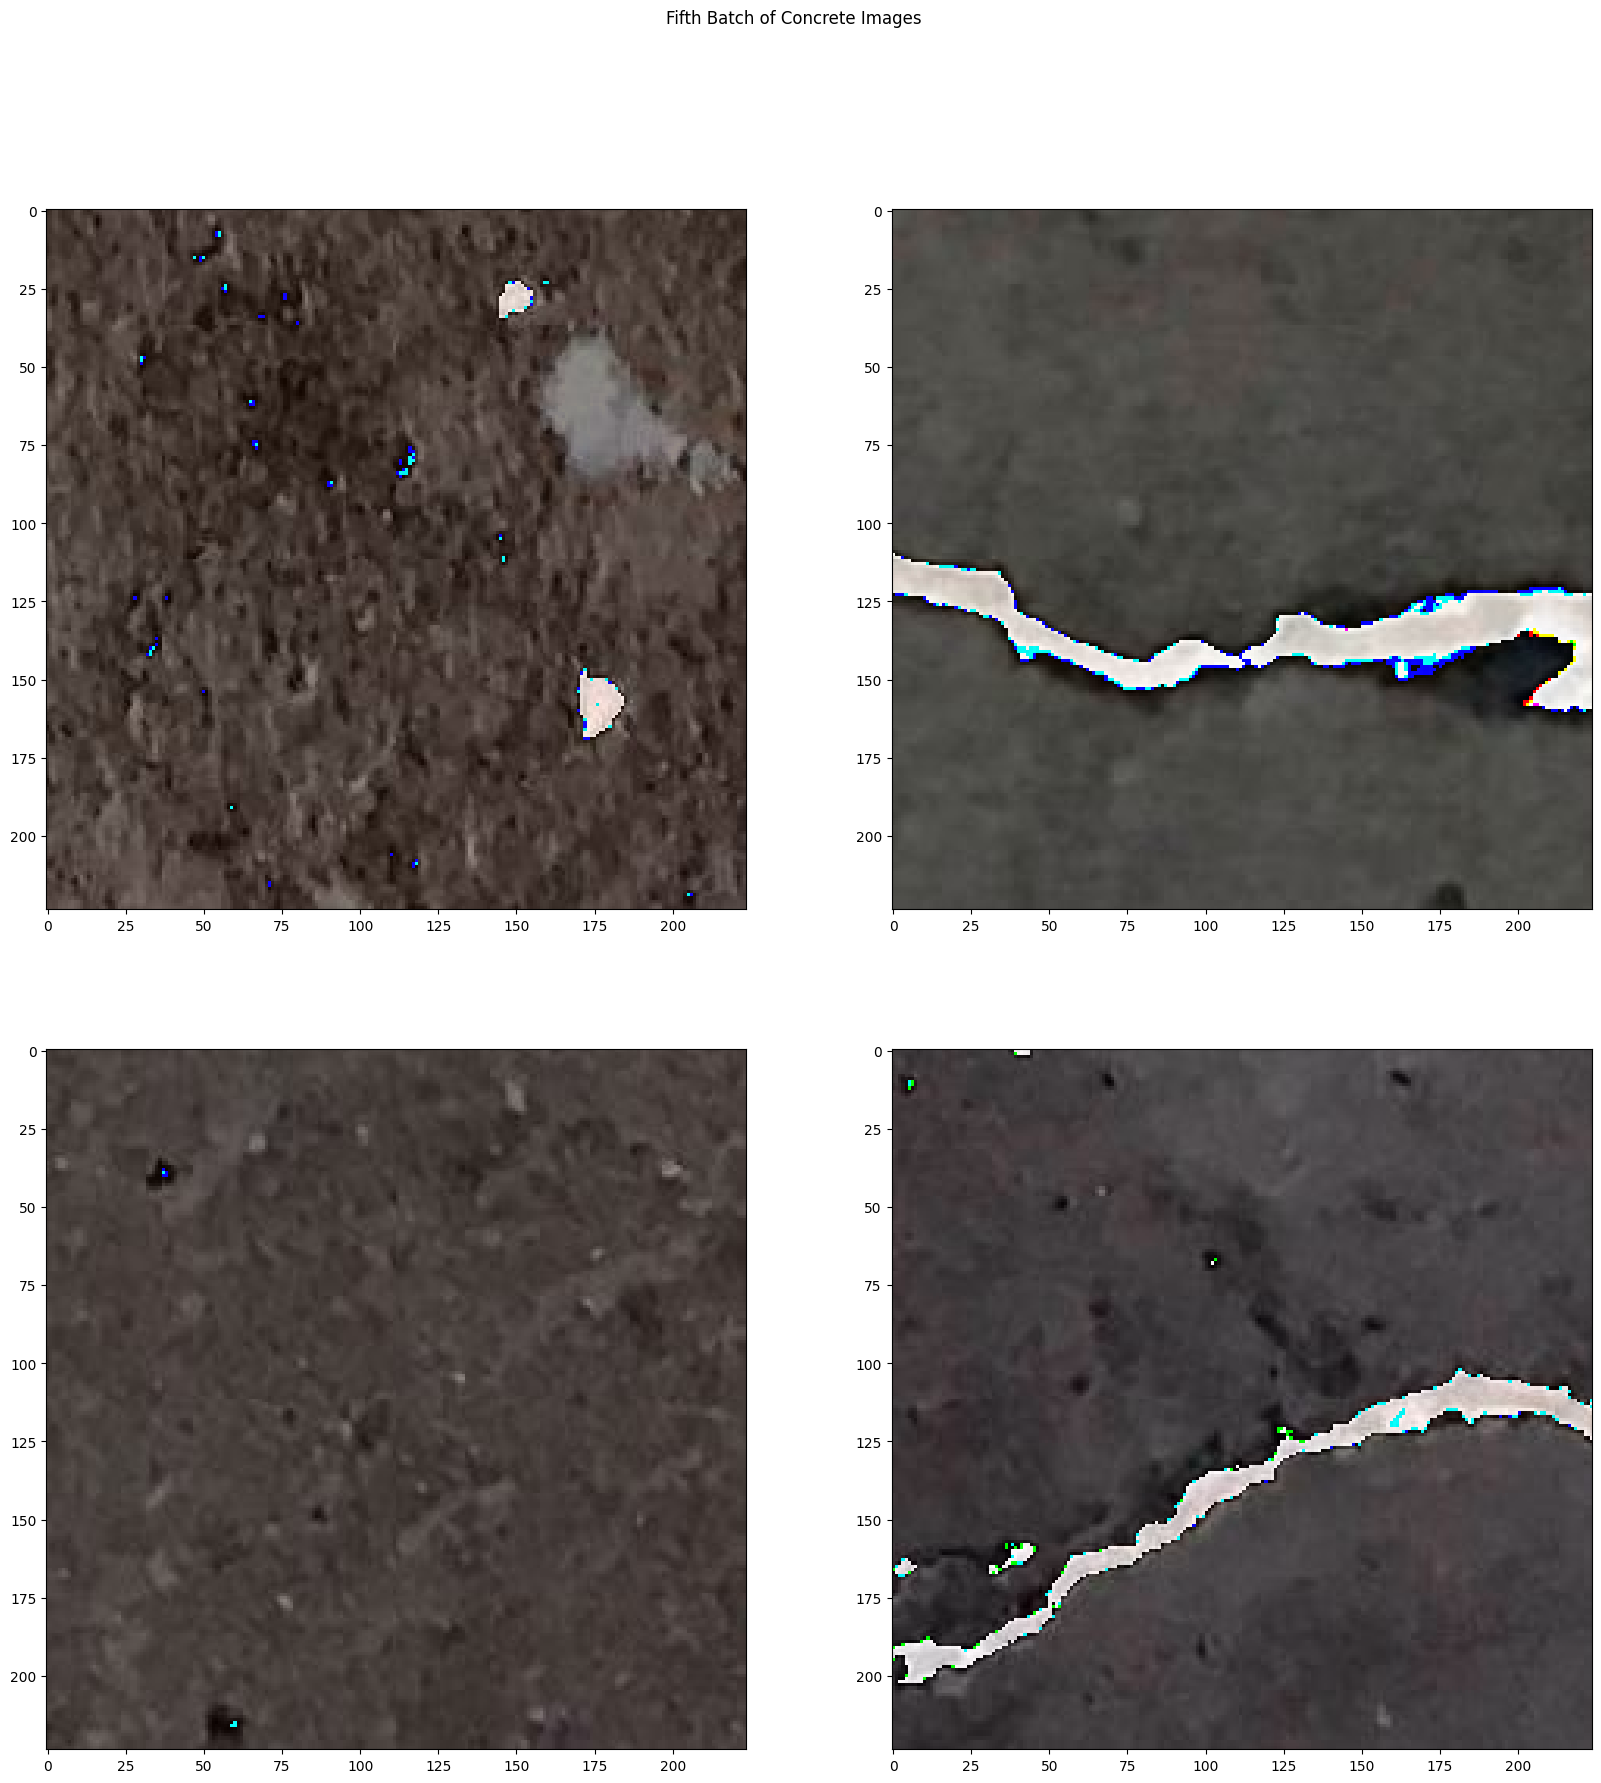

In [12]:
fig, axs= plt.subplots(nrows=2,ncols=2, figsize=(20,20))
fifth_batch = next(train_gen)
fifth_batch_images = fifth_batch[0]

ind = 0
for ax_row in axs:
  for ax_col in ax_row:
    image_data = fifth_batch_images[ind].astype(np.uint8)
    ax_col.imshow(image_data)
    ind += 1

fig.suptitle('Fifth Batch of Concrete Images')
plt.show()

In [13]:
fifth_batch_labels = fifth_batch[1]
positive = np.sum(fifth_batch_labels[:,1])
negative = np.sum(fifth_batch_labels[:,0])
print(f"Fifth batch contains {int(positive)} positive images and {int(negative)} negative images.")

Fifth batch contains 48 positive images and 52 negative images.


## Build, Compile and Fit Model

In [14]:
num_classes = 2

model = Sequential()
model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
model.add(Dense(num_classes, activation='softmax'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [15]:
model.layers[0].layers

[<InputLayer name=input_layer, built=True>,
 <ZeroPadding2D name=conv1_pad, built=True>,
 <Conv2D name=conv1_conv, built=True>,
 <BatchNormalization name=conv1_bn, built=True>,
 <Activation name=conv1_relu, built=True>,
 <ZeroPadding2D name=pool1_pad, built=True>,
 <MaxPooling2D name=pool1_pool, built=True>,
 <Conv2D name=conv2_block1_1_conv, built=True>,
 <BatchNormalization name=conv2_block1_1_bn, built=True>,
 <Activation name=conv2_block1_1_relu, built=True>,
 <Conv2D name=conv2_block1_2_conv, built=True>,
 <BatchNormalization name=conv2_block1_2_bn, built=True>,
 <Activation name=conv2_block1_2_relu, built=True>,
 <Conv2D name=conv2_block1_0_conv, built=True>,
 <Conv2D name=conv2_block1_3_conv, built=True>,
 <BatchNormalization name=conv2_block1_0_bn, built=True>,
 <BatchNormalization name=conv2_block1_3_bn, built=True>,
 <Add name=conv2_block1_add, built=True>,
 <Activation name=conv2_block1_out, built=True>,
 <Conv2D name=conv2_block2_1_conv, built=True>,
 <BatchNormalization na

In [16]:
model.layers[0].trainable = False
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         4,098 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,591,810 (90.00 MB)

 Trainable params: 4,098 (16.01 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
fit_history = model.fit(train_gen, steps_per_epoch=len(train_gen),
                                  epochs=2, validation_data=validation_gen,
                                  validation_steps=len(validation_gen), verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
101/101 ━━━━━━━━━━━━━━━━━━━━ 2802s 28s/step - accuracy: 0.9570 - loss: 0.1189 - val_accuracy: 0.9948 - val_loss: 0.0168
Epoch 2/2
101/101 ━━━━━━━━━━━━━━━━━━━━ 2774s 28s/step - accuracy: 0.9986 - loss: 0.0103 - val_accuracy: 0.9962 - val_loss: 0.0118


In [21]:
model.save('classifier_resnet_model.keras')

In [23]:
from google.colab import files
files.download('/content/classifier_resnet_model.keras')  # Download model file

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>